In [1]:
import MDSplus as mds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


In [2]:
# shot = int(input("shot: "))
# signal = input("signal: ")
shot = 100000
signal = 'JHG1'
cn  = mds.Connection('mds.ipp.ac.cn')
cn.openTree('east_1', shot)

In [3]:
shot

100000

In [4]:
signal

'JHG1'

In [5]:
ip = cn.get('\ipg')
ip = ip.data()
time_ip = cn.get('dim_of(\ipg)')
idx_begin = 6000
idx_end = np.argwhere(ip > 10)[-1,0] # The return value of argwhere is row * 1
idx_end

17825

In [6]:
pressure = cn.get(f'\\{signal}').data()
pressure

array([8.631287 , 8.634033 , 8.634644 , ..., 7.8305054, 7.8344727,
       7.838135 ], dtype=float32)

In [7]:
data = 0

In [8]:
if len(ip) > 7000 and max(pressure) - min(pressure) > 0.3:
    background = np.mean(pressure[:idx_begin])
    end_pressure = np.mean(pressure[idx_end:idx_end+1000])
    pressure = pressure[idx_begin:idx_end]
    pressure = savgol_filter(pressure, 1000,3)
    pressure[pressure>background] = background
    pressure[pressure<end_pressure] = end_pressure
    pressure = background-pressure

    Pam2P = 4.82e20 # 每pa立方米的粒子数
    kp = 2.5e4  # 充气规管的转换系数

    signal_volumes = {
                         "JHG1":3.118e-4,"JHG2":2.91e-4,"JHG3": 2.922e-4,"JHG4":2.99e-4,"JHG5":2.997e-4,"JHG6":2.949e-4,
                         "OUG1":1.4687e-3,"ODG1":1.4601e-3,"CDG1":6.792e-3,
                         "HDG1":6.75e-3,"KHG1":2.938e-4,"DHG1":2.919e-4}
    volume = signal_volumes[signal]
    pressure *= kp * volume * Pam2P
    pressure[pressure<1e18] = 0
    data = pressure
data


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.9941737e+21,
       2.9941737e+21, 2.9941737e+21], dtype=float32)

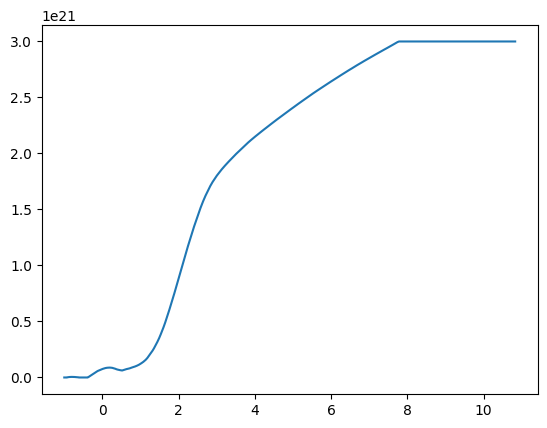

In [11]:
plt.plot(time_ip[6001:idx_end],data)